In [1]:
import pandas as pd
import numpy as np
# nltk - natural langauge processing
# wordcloud - for drawing word cloud
# matplotlib - for charting
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Read from CSV

In [2]:
data = pd.read_csv(r'responses.csv', encoding='utf-8')
data.head()

,What is your current stage of life / educational pursuit?,Are you from Singapore Management University (SMU)?,Are you from the School of Computing and Information Systems (SCIS)?,Any reasons why you chose SCIS over other IT Courses / Degrees in the other Universities? \n(E.g. NUS - Computer Science),Where were you studying at before coming into SMU?,What is/was your course of study in your educational institution?,Which Polytechnic are you from?,What was the diploma / course you are studying/have studied?,Which Junior College are you from?,What was your subject combination in Junior College?,...,Please elaborate on your ranking sequence :).3,Are you aware of or have attended any programmes organized by SMU SCIS?,"In this case, what kind of programmes would you want to participate in or hope to see more of?",What is/are the programme(s)?,"In general, how would you rate the quality of these programmes?",Please elaborate on the chosen rating,What will you use to find out more about or critique such programmes?,"Last but not the least, what is your Gender?",Submitted At,Token
0,University,Yes,Yes,No,Junior College,NaN,NaN,NaN,Victoria Junior College,MEH CSE,...,NaN,Yes,NaN,Mitb,10.0,Good,YouTube,Male,15/3/2022 0:09,xt1po8c91glpr90vqvi1i8slxt1po8c8
1,University,Yes,Yes,More industry based/practical,Junior College,NaN,NaN,NaN,Pioneer Junior College,PCME,...,NaN,No,NaN,NaN,NaN,NaN,Instagram,Male,14/3/2022 14:24,g0siq2gnksmzcwsag0sidjudrwyw2q01
2,University,Yes,Yes,want a less-technical degree that has equal ba...,Junior College,NaN,NaN,NaN,Dunman High School,GCME,...,-,Yes,NaN,pre uni exposure workshops by scis,6.0,get to be exposed in a v beginners level,school email,Female,14/3/2022 14:22,elguz828qfo5ob2qrut3delguz8bj3ni
3,University,Yes,Yes,because its SMU,Polytechnic,NaN,Nanyang Polytechnic,Engineering Informatics,NaN,NaN,...,nil,Yes,NaN,forgot sorry..,6.0,didnt attend many,Word-of-Mouth,Male,14/3/2022 13:36,hiipyebnjb1pfes8o7khj1hiipye4vka
4,University,Yes,Yes,Improve presentation skills,Junior College,NaN,NaN,NaN,Temasek Junior College,PCME,...,GES only acts as a form of reference,Yes,NaN,Virtual Information Session,8.0,Many opportunities,"Word-of-Mouth, Instagram",Female,14/3/2022 13:32,6cmxclrxrv0vqrgnzvt6cmxclrx7bi2l


## Extract Open-Ended Questions

In [3]:
# Open-Ended Questions

# 3: Why SCIS over other unis
# 11: Uni Ranking Elaboration
# 13: Courses Ranking Elaboration
# 14: 3 Words Related to SCIS
# 16: Factors for Uni Choice (CCA, Friends etc)
# 19: Courses Ranking Elaboration after GES
# 21: SCIS Programmes Hope to see / Interested in / Want to Participate
# 22: SCIS Events Attended
# 24: Elaboration on Rating SCIS Events Attended

oe_qn = data.iloc[:,[3,11,13,14,16,19,21,22,24]]
oe_qn = oe_qn.rename(columns={'Please elaborate on your ranking sequence :)': 'Uni Ranking Elaboration',
                      'Please elaborate on your ranking sequence :).1': 'Course Ranking Elaboration',
                      'Please elaborate on your ranking sequence :).2': 'Factors for Uni Choice',
                      'Please elaborate on your ranking sequence :).3': 'Course Ranking Elaboration after GES',
                      'Please elaborate on the chosen rating': 'Elaboration on Rating SCIS Events Attended',
                      'Any reasons why you chose SCIS over other IT Courses / Degrees in the other Universities? \n(E.g. NUS - Computer Science)': 'Why SCIS over other schools',
                     })
oe_qn.head()

,Why SCIS over other schools,Uni Ranking Elaboration,Course Ranking Elaboration,3 words that come into your mind together with SMU SCIS,Factors for Uni Choice,Course Ranking Elaboration after GES,"In this case, what kind of programmes would you want to participate in or hope to see more of?",What is/are the programme(s)?,Elaboration on Rating SCIS Events Attended
0,No,NaN,NaN,"Good, demanding, huge",NaN,NaN,NaN,Mitb,Good
1,More industry based/practical,Name / program,Rep and igp,"Reputation, good, recognised",NaN,NaN,NaN,NaN,NaN
2,want a less-technical degree that has equal ba...,"nus confirm first la so vigorous, ntu quite ol...",by feel,"average, not-so-technical, tough",dont want to stay in hall and interact as soci...,-,NaN,pre uni exposure workshops by scis,get to be exposed in a v beginners level
3,because its SMU,ntu and nus students are more technically skilled,NIL,Huge,"got Rome Q, no Rome Q no sch",nil,NaN,forgot sorry..,didnt attend many
4,Improve presentation skills,SMU has smaller group seminars,SMU provides out of classroom opportunities,"Interactive, Welcoming, Good",Enjoy working with friends,GES only acts as a form of reference,NaN,Virtual Information Session,Many opportunities


In [4]:
# Removing all forms of null, NaN, Nil etc. Replaced with empty strings. - is replaced with whitespce

oe_qn = oe_qn.replace(np.nan, '', regex=True)
oe_qn = oe_qn.replace(r'[-]+', ' ', regex=True)
oe_qn = oe_qn.replace('NIL|nil|Nil', '', regex=True)
oe_qn.head()

,Why SCIS over other schools,Uni Ranking Elaboration,Course Ranking Elaboration,3 words that come into your mind together with SMU SCIS,Factors for Uni Choice,Course Ranking Elaboration after GES,"In this case, what kind of programmes would you want to participate in or hope to see more of?",What is/are the programme(s)?,Elaboration on Rating SCIS Events Attended
0,No,,,"Good, demanding, huge",,,,Mitb,Good
1,More industry based/practical,Name / program,Rep and igp,"Reputation, good, recognised",,,,,
2,want a less technical degree that has equal ba...,"nus confirm first la so vigorous, ntu quite ol...",by feel,"average, not so technical, tough",dont want to stay in hall and interact as soci...,,,pre uni exposure workshops by scis,get to be exposed in a v beginners level
3,because its SMU,ntu and nus students are more technically skilled,,Huge,"got Rome Q, no Rome Q no sch",,,forgot sorry..,didnt attend many
4,Improve presentation skills,SMU has smaller group seminars,SMU provides out of classroom opportunities,"Interactive, Welcoming, Good",Enjoy working with friends,GES only acts as a form of reference,,Virtual Information Session,Many opportunities


In [5]:
# Cleaning up answers in the df
import re

for column in oe_qn:
    oe_qn[column] = oe_qn[column].str.lower() # Lowercase
    oe_qn[column] = oe_qn[column].str.replace('[^\w\s]', ' ') # Remove Special Characters
    # oe_qn[column] = oe_qn[column].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])) # Remove Stopwords
    
oe_qn.head()

<ipython-input-5-ca815b51d9b8>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  oe_qn[column] = oe_qn[column].str.replace('[^\w\s]', ' ') # Remove Special Characters


,Why SCIS over other schools,Uni Ranking Elaboration,Course Ranking Elaboration,3 words that come into your mind together with SMU SCIS,Factors for Uni Choice,Course Ranking Elaboration after GES,"In this case, what kind of programmes would you want to participate in or hope to see more of?",What is/are the programme(s)?,Elaboration on Rating SCIS Events Attended
0,no,,,good demanding huge,,,,mitb,good
1,more industry based practical,name program,rep and igp,reputation good recognised,,,,,
2,want a less technical degree that has equal ba...,nus confirm first la so vigorous ntu quite ol...,by feel,average not so technical tough,dont want to stay in hall and interact as soci...,,,pre uni exposure workshops by scis,get to be exposed in a v beginners level
3,because its smu,ntu and nus students are more technically skilled,,huge,got rome q no rome q no sch,,,forgot sorry,didnt attend many
4,improve presentation skills,smu has smaller group seminars,smu provides out of classroom opportunities,interactive welcoming good,enjoy working with friends,ges only acts as a form of reference,,virtual information session,many opportunities


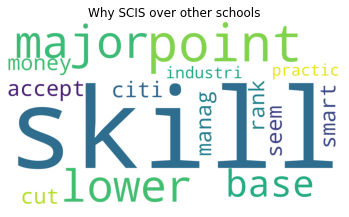

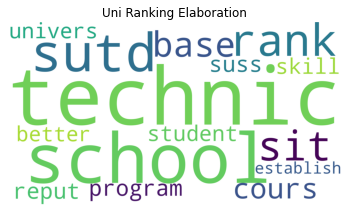

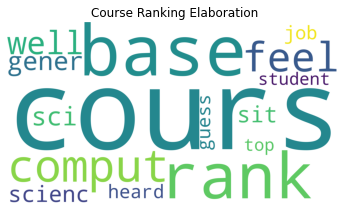

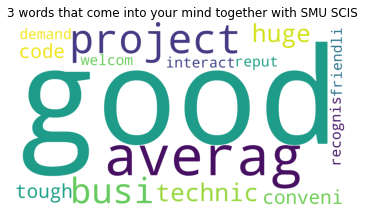

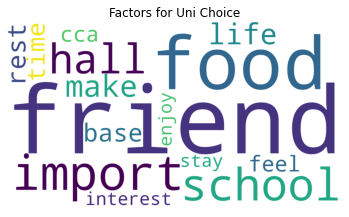

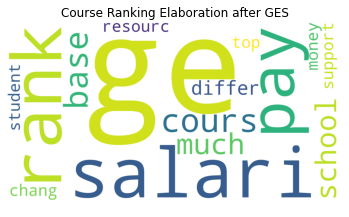

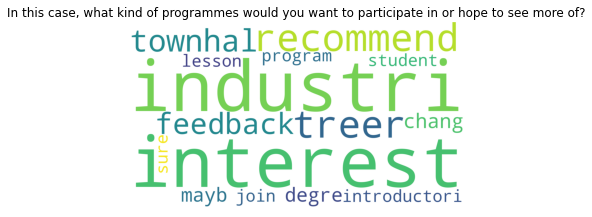

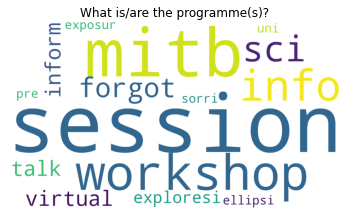

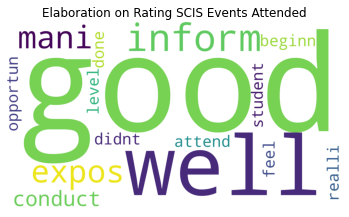

In [6]:
stop_words = stopwords.words('english')
stop_words.extend(['congrats', 'lol', 'yup', 'thanks', 'nope', 
                   'http', 'www', 'com', 'https','amp', 'sg', 
                   'reddit', 'gt', 'la','lor', 'le', 'leh', 'smu',
                   'ntu' , 'nus', 'want', 'lol', 'hi', 'hai', 'haha', 
                   'hahaha', 'yeah', 'yay', 'ya', 'yup', 'yupz', 
                   'yea', 'yep', 'yeap', 'yes', 'nah', 'nope', 'yo', 
                   'ok', 'okay', 'xp', 'xd', 'le', 'na', 'lmao', 'im', 'u', 
                   'youre', 'lo', 'loh', 'lor', 'la', 'lah', 'oso', 'wat', 'leh', 
                   'mah', 'meh', 'siao', 'wah liao', 'wah lau', 'wah piang', 'kenna', 
                   'kena', 'btw', 'kk', 'ah', 'oic', 'ahh', 'oh', 'haiz', 'omg', 'omigod', 
                   'omygawd', 'hey', 'r', 'g', 'o', 'k', 'sibei', 'sibeh', 'jialat', 'arh', 
                   'eh', 'xx', 'hmm', 'de', '2', 'n', 'liao', 'cant', 'thru', 'dont', 'dun', 
                   'v', '4', 'ur', 'cos', 'coz', 'ive', 'ha', 'tt', 'h', 'b', 'th', 'brb', 
                   'decimal', 'duno', 'huh', 'hiya', 'hm', 'ill', 'dunno', 'den', 'aa', 'wtf', 
                   'ill', 'fucking', 'fuck', 'fk', 'shit', 'might', 'need', 'got', 'rome', 'q'])

for (columnName, columnData) in oe_qn.iteritems():
    qn_content = ''
    for line in oe_qn[columnName]:
        if len(line.strip()) > 0: # Eliminates empty answers
            qn_content += line + ' '    
    
    # Tokenize Words
    tokenizer = RegexpTokenizer(r'\w+')
    words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words
    #print(words_content)
    #print(len(words_content))
    
    # Remove stop words
    words_filtered = []
    for w in words_content:
        if w not in stop_words:
            words_filtered.append(w)
            
    #print(words_filtered)
    #print(len(words_filtered))
    
    # Porter Stemmer
    porter_stemmer = PorterStemmer()
    
    words_stemmed = []
    for w in words_filtered:
        words_stemmed.append(porter_stemmer.stem(w))
        
    #print(words_stemmed)
    
    # WordCloud
    words_joined = " ".join([w for w in words_stemmed])

    # Create a word cloud
    my_wordcloud = WordCloud(background_color='white', max_words = 15, max_font_size = 1000,
                         width=2500,
                         height=1400).generate(words_joined)

    plt.imshow(my_wordcloud)
    plt.axis('off')
    plt.title(columnName)
    plt.show()
    # plt.savefig(columnName, dpi=300)

## Topic Modelling

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


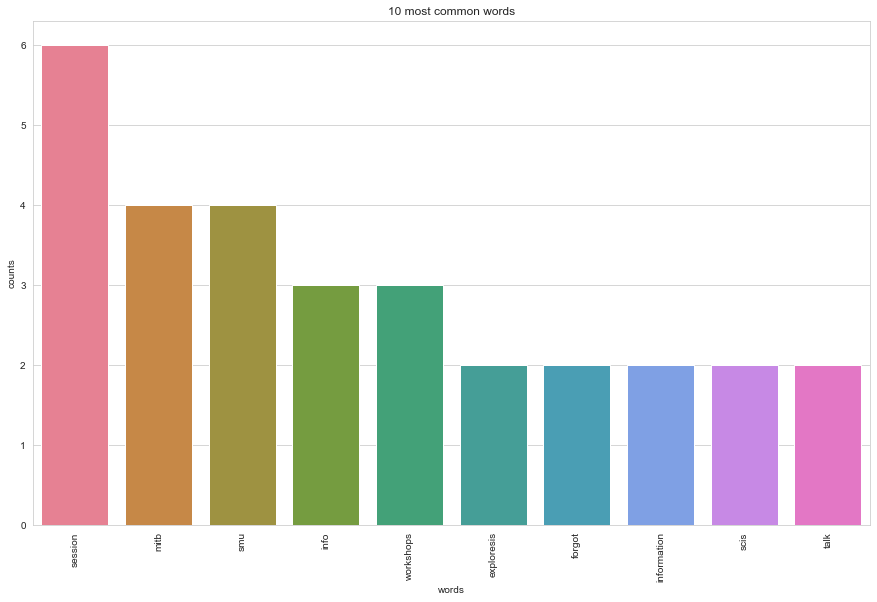

In [7]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(
    oe_qn['What is/are the programme(s)?']
)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [8]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
info talk session exploresis smt major project experience metamorphosis degree

Topic #1:
mitb smu session information virtual singapore react introduction workshop info

Topic #2:
session networking competition exploresis hackathon forgot workshops info smu mitb

Topic #3:
forgot workshops scis exposure uni pre sorry day sis exploresis

Topic #4:
workshops series tech data management ellipsis hackathon exploresis forgot session


## Extract Non-OE Questions

In [9]:
# Non-OE Questions

noe_qn = data.drop(data.iloc[:,[3,11,13,14,16,19,21,22,24]], axis = 1)
noe_qn = noe_qn.drop(columns=['Submitted At', 'Token'])
noe_qn.head()

,What is your current stage of life / educational pursuit?,Are you from Singapore Management University (SMU)?,Are you from the School of Computing and Information Systems (SCIS)?,Where were you studying at before coming into SMU?,What is/was your course of study in your educational institution?,Which Polytechnic are you from?,What was the diploma / course you are studying/have studied?,Which Junior College are you from?,What was your subject combination in Junior College?,"In terms of IT, rank the following according to their offerings of the best courses / opportunities / expertise in this sector.",Rank the following IT courses offered by the universities,How important are these factors to you in deciding the choice of university or tertiary education?,"After looking at the GES, rank the following IT courses offered by the universities",Were there any changes in your rankings after looking at the GES?,Are you aware of or have attended any programmes organized by SMU SCIS?,"In general, how would you rate the quality of these programmes?",What will you use to find out more about or critique such programmes?,"Last but not the least, what is your Gender?"
0,University,Yes,Yes,Junior College,NaN,NaN,NaN,Victoria Junior College,MEH CSE,"National University of Singapore (NUS), Singap...","NUS Business Analytics, NUS Computer Science, ...","Co-Curricular Activities, Friends / Close Frie...","SMU Computer Science, SMU Information Systems,...",NaN,Yes,10.0,YouTube,Male
1,University,Yes,Yes,Junior College,NaN,NaN,NaN,Pioneer Junior College,PCME,"National University of Singapore (NUS), Singap...","NUS Computer Science, SMU Computer Science, SM...","Friends / Close Friends, Food, Co-Curricular A...","SMU Computer Science, SMU Information Systems,...",Yes,No,NaN,Instagram,Male
2,University,Yes,Yes,Junior College,NaN,NaN,NaN,Dunman High School,GCME,"National University of Singapore (NUS), Nanyan...","NUS Computer Science, NUS Information Security...","Staying in Hall / Dormitories, Co-Curricular A...","NUS Computer Science, NUS Information Security...",Yes,Yes,6.0,school email,Female
3,University,Yes,Yes,Polytechnic,NaN,Nanyang Polytechnic,Engineering Informatics,NaN,NaN,"Nanyang Technological University (NTU), Nation...","SMU Information Systems, SMU Computer Science,...","Friends / Close Friends, Entertainment Venues ...","SMU Information Systems, SMU Computer Science,...",No,Yes,6.0,Word-of-Mouth,Male
4,University,Yes,Yes,Junior College,NaN,NaN,NaN,Temasek Junior College,PCME,"Singapore Management University (SMU), Nationa...","SMU Information Systems, SMU Computer Science,...","Friends / Close Friends, Food, Co-Curricular A...","SMU Information Systems, SMU Computer Science,...",No,Yes,8.0,"Word-of-Mouth, Instagram",Female


In [10]:
# Removing all forms of null, NaN, Nil etc. Replaced with empty strings. - is replaced with whitespce

noe_qn = noe_qn.replace(np.nan, '', regex=True)
noe_qn = noe_qn.replace(r'[-]+', ' ', regex=True)
noe_qn = noe_qn.replace('NIL|nil|Nil', '', regex=True)
noe_qn.head()

,What is your current stage of life / educational pursuit?,Are you from Singapore Management University (SMU)?,Are you from the School of Computing and Information Systems (SCIS)?,Where were you studying at before coming into SMU?,What is/was your course of study in your educational institution?,Which Polytechnic are you from?,What was the diploma / course you are studying/have studied?,Which Junior College are you from?,What was your subject combination in Junior College?,"In terms of IT, rank the following according to their offerings of the best courses / opportunities / expertise in this sector.",Rank the following IT courses offered by the universities,How important are these factors to you in deciding the choice of university or tertiary education?,"After looking at the GES, rank the following IT courses offered by the universities",Were there any changes in your rankings after looking at the GES?,Are you aware of or have attended any programmes organized by SMU SCIS?,"In general, how would you rate the quality of these programmes?",What will you use to find out more about or critique such programmes?,"Last but not the least, what is your Gender?"
0,University,Yes,Yes,Junior College,,,,Victoria Junior College,MEH CSE,"National University of Singapore (NUS), Singap...","NUS Business Analytics, NUS Computer Science, ...","Co Curricular Activities, Friends / Close Frie...","SMU Computer Science, SMU Information Systems,...",,Yes,10.0,YouTube,Male
1,University,Yes,Yes,Junior College,,,,Pioneer Junior College,PCME,"National University of Singapore (NUS), Singap...","NUS Computer Science, SMU Computer Science, SM...","Friends / Close Friends, Food, Co Curricular A...","SMU Computer Science, SMU Information Systems,...",Yes,No,,Instagram,Male
2,University,Yes,Yes,Junior College,,,,Dunman High School,GCME,"National University of Singapore (NUS), Nanyan...","NUS Computer Science, NUS Information Security...","Staying in Hall / Dormitories, Co Curricular A...","NUS Computer Science, NUS Information Security...",Yes,Yes,6.0,school email,Female
3,University,Yes,Yes,Polytechnic,,Nanyang Polytechnic,Engineering Informatics,,,"Nanyang Technological University (NTU), Nation...","SMU Information Systems, SMU Computer Science,...","Friends / Close Friends, Entertainment Venues ...","SMU Information Systems, SMU Computer Science,...",No,Yes,6.0,Word of Mouth,Male
4,University,Yes,Yes,Junior College,,,,Temasek Junior College,PCME,"Singapore Management University (SMU), Nationa...","SMU Information Systems, SMU Computer Science,...","Friends / Close Friends, Food, Co Curricular A...","SMU Information Systems, SMU Computer Science,...",No,Yes,8.0,"Word of Mouth, Instagram",Female


In [11]:
noe_qn.describe()

,What is your current stage of life / educational pursuit?,Are you from Singapore Management University (SMU)?,Are you from the School of Computing and Information Systems (SCIS)?,Where were you studying at before coming into SMU?,What is/was your course of study in your educational institution?,Which Polytechnic are you from?,What was the diploma / course you are studying/have studied?,Which Junior College are you from?,What was your subject combination in Junior College?,"In terms of IT, rank the following according to their offerings of the best courses / opportunities / expertise in this sector.",Rank the following IT courses offered by the universities,How important are these factors to you in deciding the choice of university or tertiary education?,"After looking at the GES, rank the following IT courses offered by the universities",Were there any changes in your rankings after looking at the GES?,Are you aware of or have attended any programmes organized by SMU SCIS?,"In general, how would you rate the quality of these programmes?",What will you use to find out more about or critique such programmes?,"Last but not the least, what is your Gender?"
count,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
unique,2,2,3,5,1,6,16,10,7,19,32,25,30,3,2,8,26,2
top,University,Yes,Yes,Polytechnic,,,,,,"National University of Singapore (NUS), Nanyan...","SMU Information Systems, SMU Computer Science,...","Friends / Close Friends, Food, Co Curricular A...","SMU Information Systems, SMU Computer Science,...",Yes,Yes,,Word of Mouth,Male
freq,31,31,29,16,33,15,15,22,22,6,2,3,3,19,19,14,4,18


<AxesSubplot:xlabel='Last but not the least, what is your Gender?'>

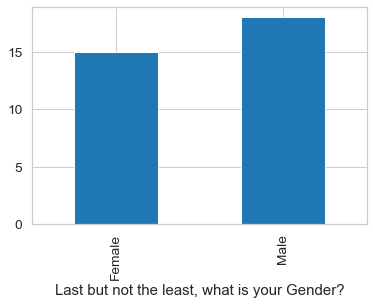

In [12]:
gender = noe_qn.groupby(noe_qn['Last but not the least, what is your Gender?'])
gender.size().plot(kind='bar')

<AxesSubplot:xlabel='What is your current stage of life / educational pursuit?'>

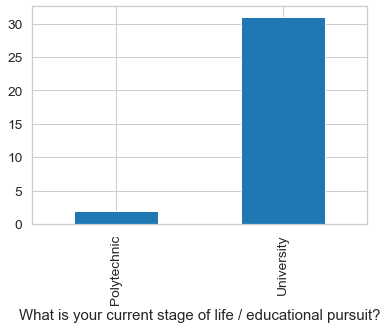

In [13]:
current_stage = noe_qn.groupby(noe_qn['What is your current stage of life / educational pursuit?'])
current_stage.size().plot(kind='bar')

<AxesSubplot:xlabel='Which Polytechnic are you from?'>

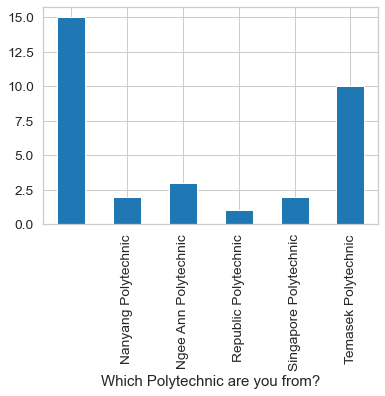

In [14]:
poly = noe_qn.groupby(noe_qn['Which Polytechnic are you from?'])
poly.size().plot(kind='bar')

In [15]:
poly = noe_qn.groupby(noe_qn['Which Junior College are you from?'])
poly.size()

Which Junior College are you from?
                            22
Catholic Junior College      2
Dunman High School           1
Hwa Chong Junior College     1
Pioneer Junior College       1
Raffles Junior College       1
Tampines Junior College      1
Temasek Junior College       2
Victoria Junior College      1
Yishun Junior college        1
dtype: int64

<AxesSubplot:xlabel='What was the diploma / course you are studying/have studied?'>

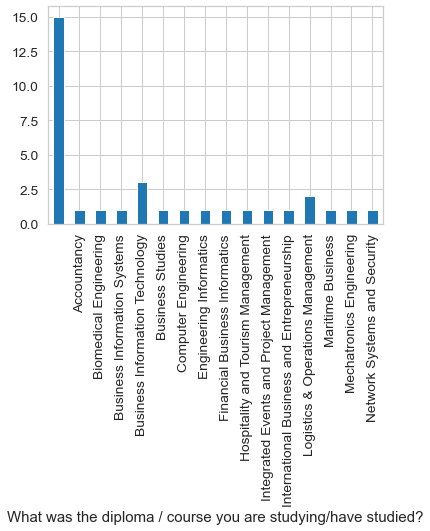

In [16]:
dip = noe_qn.groupby(noe_qn['What was the diploma / course you are studying/have studied?'])
dip.size().plot(kind='bar')

In [17]:
# Take note if ranking changes after GES